<a href="https://colab.research.google.com/github/Shiji-Shajahan/ReDI-Final-Project-2020-Google-Play-store-App-Analaysis/blob/main/Google_Play_Store_Apps_Analysis_ReDI_Project_Shiji_Shajahan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Import necessary Libraries** 

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# word cloud library
from wordcloud import WordCloud
from datetime import datetime as dt #for date conversion
import plotly
import plotly.graph_objs as go

##**2. Loading DataSet**

Read googleplaystore.csv as a dataframe called playstore

In [124]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [125]:
playstore = pd.read_csv('/content/drive/My Drive/REDI Project on Googleplaystore/googleplaystore.csv')

** Check the head of the DataFrame. **

In [126]:
#head(): It returns the first five data.
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


** Check the columns of the DataFrame. **

In [127]:
#App: Application name
#Category: Category the app belongs to
#Rating: Overall user rating of the app
#Reviews: Number of user reviews for the app
#Size: Size of the app
#Installs: Number of user downloads/installs for the app
#Type: Paid or Free
#Price: Price of the app
#Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
#Genres: An app can belong to multiple genres (apart from its main category)
#Last Updated: Date when the app was last updated on Play Store
#Current Ver:Current version of the app available on Play Store
#Android Ver: Min required Android version

#columns : It returns data columns
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

** Check the shape of the DataFrame. **

In [128]:
#shape : It gives number of rows and columns in a tuble.
playstore.shape

(10841, 13)

##**3.Removing Outliers**

It seems there is an abnormal data point. The maximum rating that an application can have is 5 but there is a higher value based on the plot above.

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
AxesSubplot(0.125,0.125;0.775x0.755)


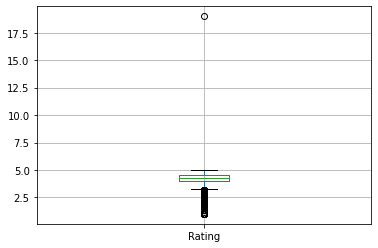

In [129]:
print(playstore.Rating.unique())

#Boxplot for Review
#One value is out of range
print(playstore.boxplot())

In [130]:
#Checking the Rating Column for finding Outliers
playstore[playstore.Rating>5]

#Removing the Outlier value 19.0 from Rating
playstore.drop([10472],inplace=True)

## **4. Data Cleaning and Data Manipulation**

In [131]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


##Data Cleaning

In [132]:
# remove duplicates in play store
playstore= playstore.drop_duplicates(subset='App')
print(playstore.shape)

#count the number of missing values in Dataframe
print(playstore.isnull().sum())

#Fill the null values using aggregate functions median and mode
#Define a function perform_median
def perform_median(rate):
    return rate.fillna(rate.median())

playstore.Rating = playstore['Rating'].transform(perform_median)
playstore.isnull().sum()

## Removing null values on Type, Current version and Android version
# Fill the missing categorical values with mode
playstore['Type'].fillna(str(playstore['Type'].mode().values[0]), inplace=True)
playstore['Current Ver'].fillna(str(playstore['Current Ver'].mode().values[0]), inplace=True)
playstore['Android Ver'].fillna(str(playstore['Android Ver'].mode().values[0]), inplace=True)
playstore.isnull().sum()

(9659, 13)
App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##Data Manipulation

In [133]:
#Modifying the format of Price column
playstore['Price'] = playstore['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
playstore['Price'] = playstore['Price'].apply(lambda x: float(x))
playstore['Reviews'] = pd.to_numeric(playstore['Reviews'], errors='coerce')

#Removing the '+',',' signs in Installs column
playstore['Installs'] = playstore['Installs'].apply(lambda x: str(x).replace('+', '') )
playstore['Installs'] = playstore['Installs'].apply(lambda x: str(x).replace(',', ''))
playstore['Installs'] = playstore['Installs'].apply(lambda x: float(x))

##Data type of Size is object.#change 'Varies with device' value with Nan 
playstore['Size'] = playstore.Size.replace("Varies with device",np.nan)
# All size values became the kilobyte type
playstore['Size'] = playstore.Size.str.replace("M","000") 
playstore['Size'] = playstore.Size.str.replace("k","")
playstore['Size'] = playstore.Size.replace("1,000+",1000)
playstore['Size'] =playstore['Size'].astype(float)
playstore['Size'].dtype

#The Data set after data cleaning
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###Word Cloud

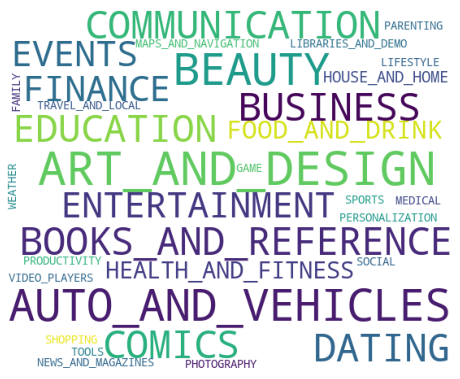

In [134]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',width=550,height=450).generate(" ".join(category_list))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('data_graph.png')
plt.show()

##Results and Discussion

##5.Data Analysis and Data Visualization

###5.1 Correlation Map

In [135]:
#corr() : It returns correlation.
playstore.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050207,0.043991,0.034307,-0.018662
Reviews,0.050207,1.000000,0.176255,0.625165,-0.007598
Size,0.043991,0.176255,1.000000,0.133988,-0.022141
Installs,0.034307,0.625165,0.133988,1.000000,-0.009405
Price,-0.018662,-0.007598,-0.022141,-0.009405,1.000000


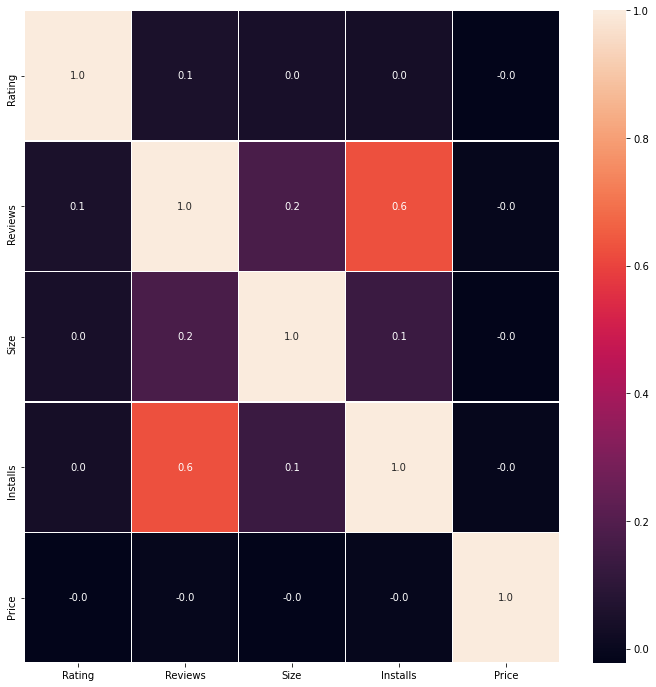

In [136]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(playstore.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Observation: We notice that there is no strong correlation to significantly deviate our observations and deduction from the truth. had there been any correlation, this wouldn't have been half as interesting.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



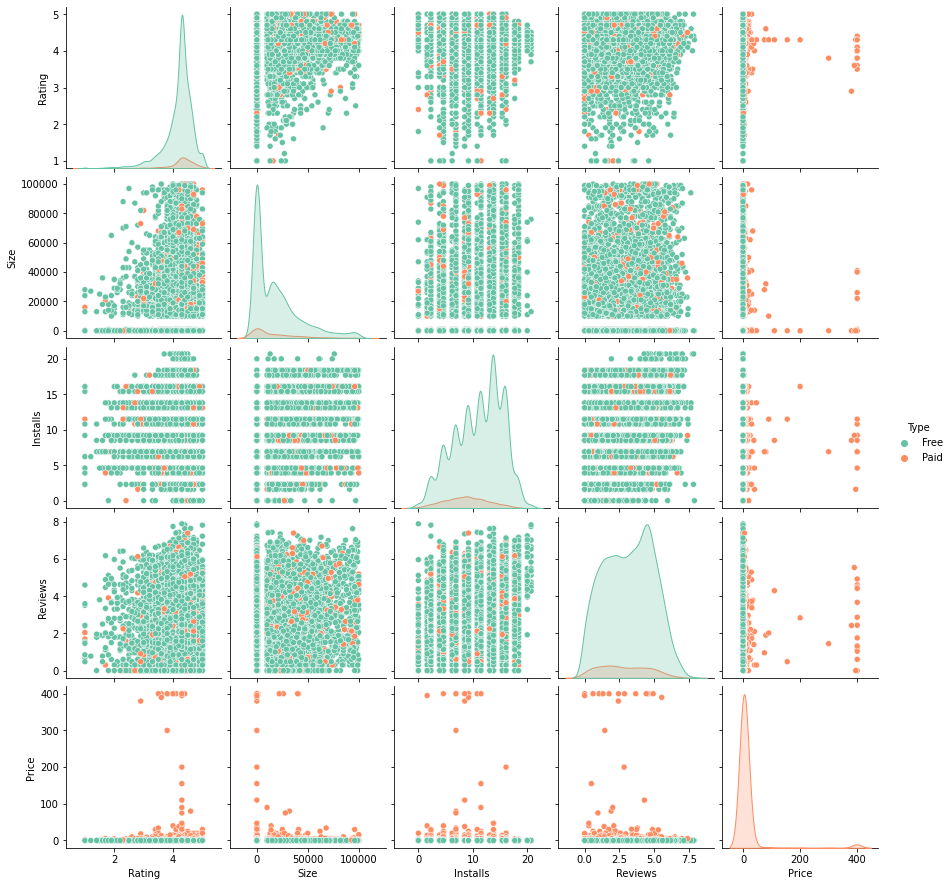

In [137]:
#pairplot will plot pairwise relationships across entire 
# pass a catigorical column to hue and it will color the data points based on the category.
x = playstore['Rating']
y = playstore['Size']
z = playstore['Installs'][playstore.Installs!=0].dropna()
p = playstore['Reviews'][playstore.Reviews!=0].dropna()
t = playstore['Type'].dropna()
price = playstore['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

###5.2 Category and Installs

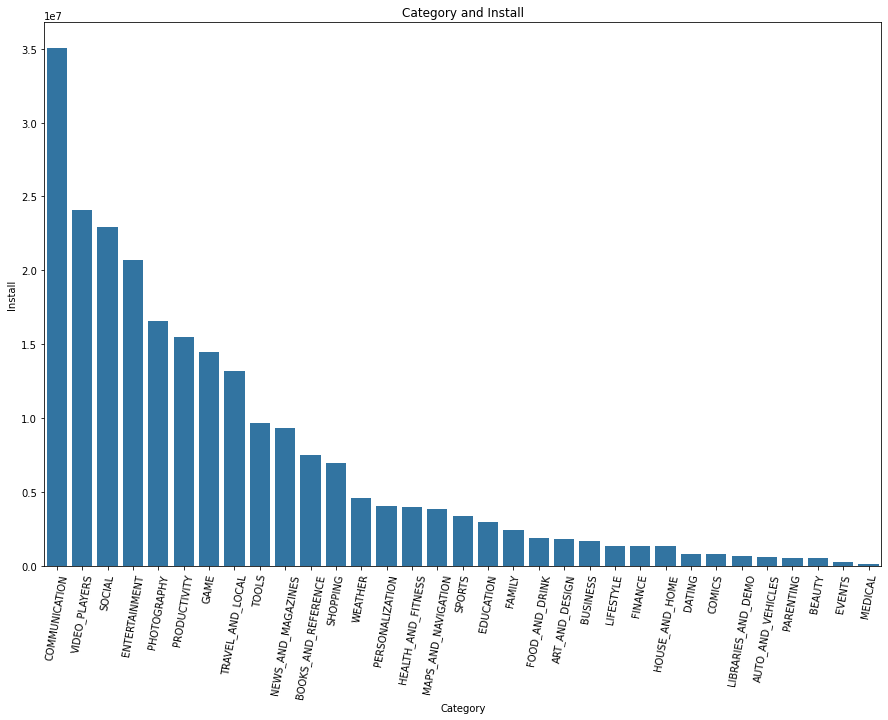

In [138]:
category_list = list(playstore['Category'].unique())
category_install = []
for i in category_list:
    x = playstore[playstore['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
category_install_data = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (category_install_data['install'].sort_values(ascending=False)).index.values
sorted_data =category_install_data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'],color='#1f77b4')
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

5.2 Observation 

The above graph displays the top categories of applications ranked by their total number of Installations. It can be clearly observed that Communication have the largest installations, closely followed by Video_players.

Thus, for an ambitious entrepreneur (ignoring numerous other parameters for convenience), more success would be found if investment is made in communication apps instead of gaming apps, due to the higher probability of being installed.

###5.3 Category and Reviews

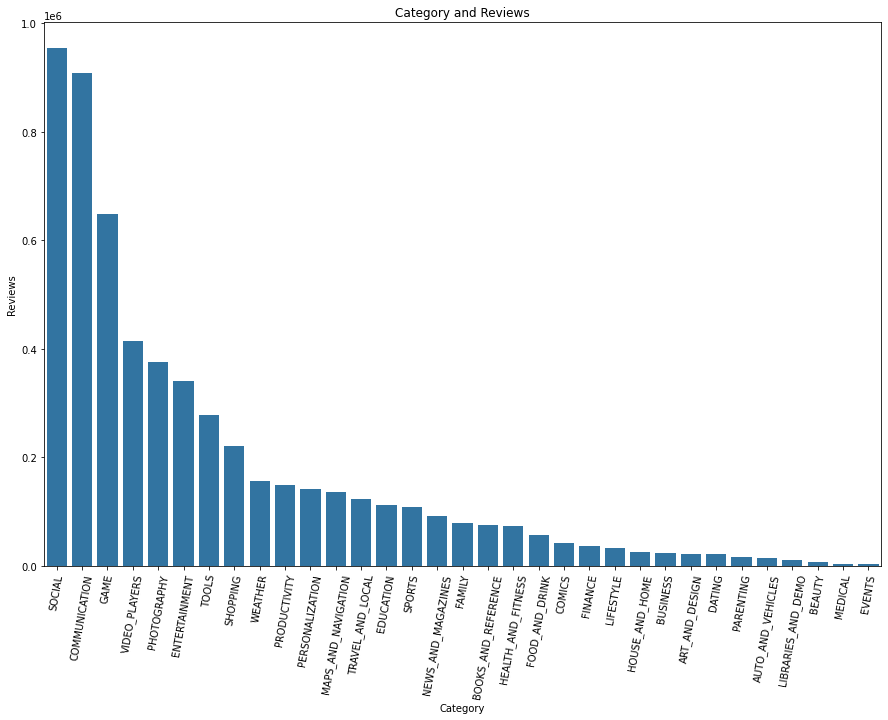

In [139]:
category_list = list(playstore['Category'].unique())
category_review = []
for i in category_list:
    x = playstore[playstore['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
category_reviews_data = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (category_reviews_data['review'].sort_values(ascending=False)).index.values
sorted_data =category_reviews_data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'],color='#1f77b4')
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

5.3 Observation

It can be stated that the major development work is performed in Social,Communication and Game apps, as customers are constantly interacting with the developers expressing their appreciation and complaints.

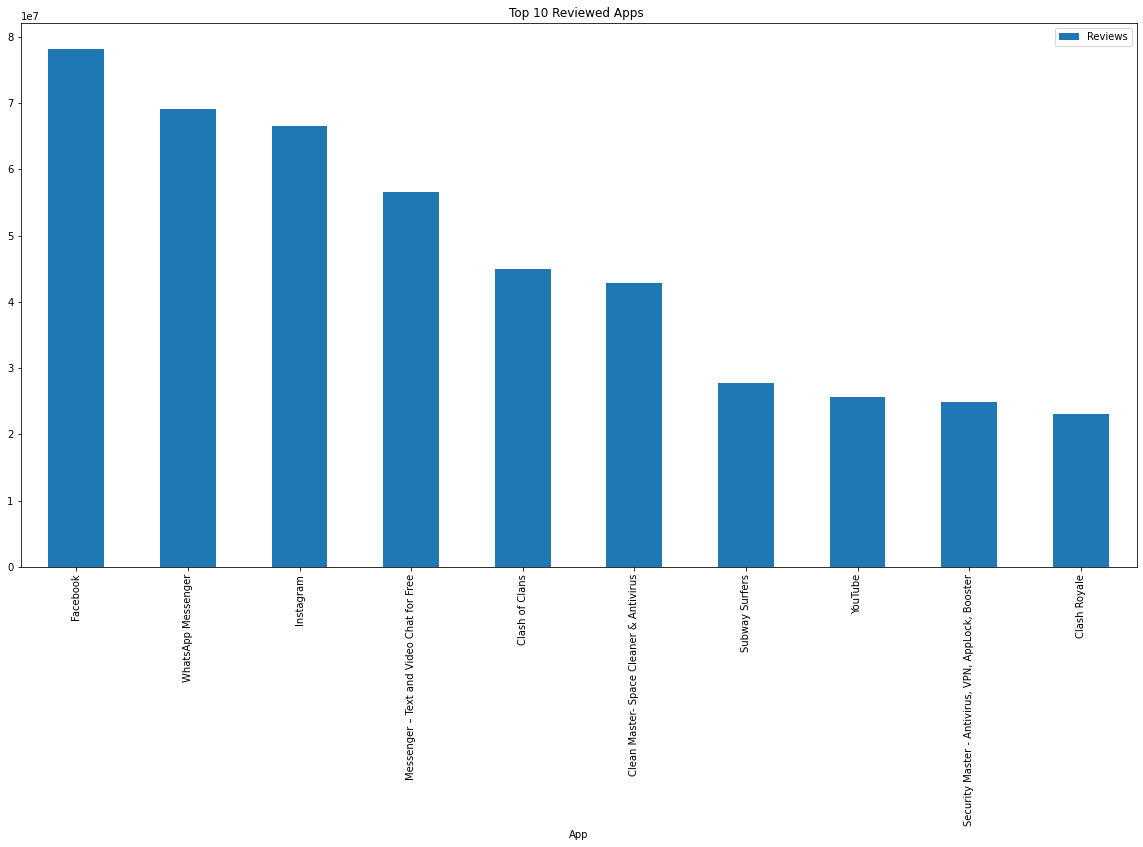

In [140]:
# Graphical view of Top 10 Apps based on number of Reviews
playstore[['App','Reviews']].sort_values('Reviews',ascending=False).head(10).plot(kind='bar',figsize=(20,10),x='App',y='Reviews',title='Top 10 Reviewed Apps ')

Facebook, Whatsapp and Instagram are top reviewed applications also because they are top installed applications

##5.4 Top Apps under Genres

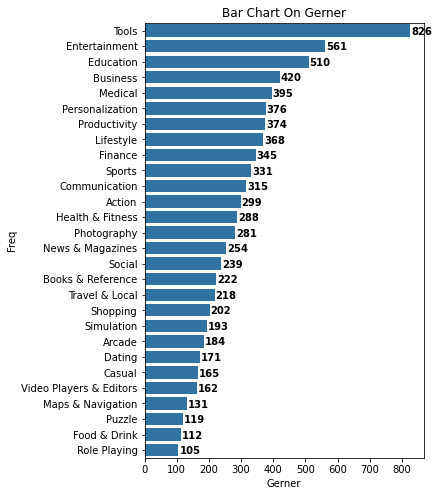

In [141]:
list_2 = ['Genres']
def bar_plot(x,y,y_label,x_label,title,color,ax=None):
    plt.figure(figsize=(5,8))
    bar = sns.barplot(x = x,y=y,orient='h',color='#1f77b4')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        bar.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar
df2 = playstore['Genres'].value_counts()
df2 = df2.reset_index()
df2 = df2[df2['Genres'] > 100]
bar_plot(x = df2['Genres'],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On Gerner',color='#1f77b4',x_label='Gerner')

5.4 Observation

Highest apps are made on tools, entertainment and education

##5.5 Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 

In [147]:
genres=  list(df2['index'][1:10])
d = pd.DatetimeIndex(playstore['Last Updated'])
playstore['year'] = d.year
playstore['month'] = d.month

for i in genres:
    
    play = playstore[(playstore['Installs'] != '1,000,000,000+') & (playstore['Genres'] == i) & (playstore['Rating'] >= 4.5) & (playstore['year'] == 2018)]['App']
    print('')
    print('Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in {}'.format(i))
    print('--------------------------------------------------')
    print(play[0:10])


Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Entertainment
--------------------------------------------------
876                     ivi - movies and TV shows in HD
882    🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
883            Movies by Flixster, with Rotten Tomatoes
889      Twitch: Livestream Multiplayer Games & Esports
899                   Fandango Movies - Times + Tickets
911                          Investigation Discovery GO
941                                             CW Seed
945                                                 WWE
991                      ColorFul - Adult Coloring Book
994                         Hamilton — The Official App
Name: App, dtype: object

Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Education
--------------------------------------------------
700                                TED
702                       Khan Academy
703         Learn English with Wlingua
707       

##5.6 Price Versus Rating

Text(0.5, 1.0, 'Price VS Rating')

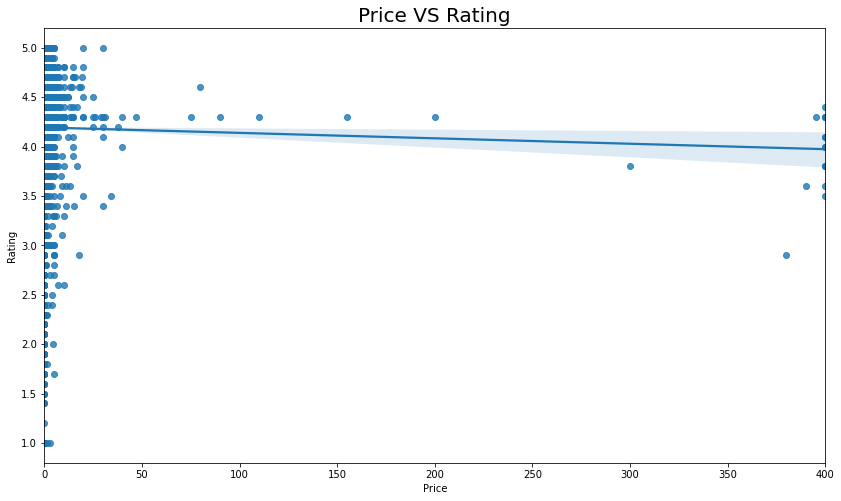

In [142]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Rating", data=playstore)
plt.title("Price VS Rating", size=20)

5.6 Observation

Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore

Looks like apps either has a price lower than 100, or price greater than 300

## 5.7 Does the last update date has an effect on rating?

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object


Text(0.5, 1.0, 'Update Year VS Rating')

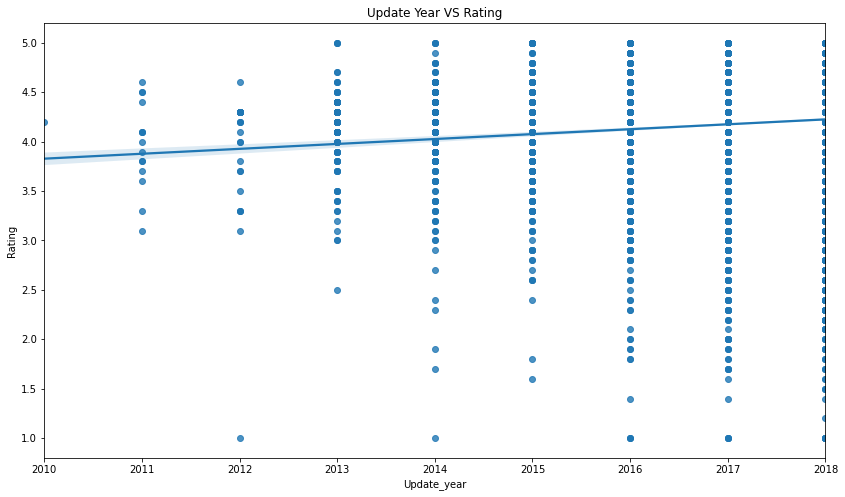

In [143]:
#look at the last updated column
print(playstore['Last Updated'].head())

#change the date column to a date format from object type
playstore["Update_date"] = playstore['Last Updated'].apply(lambda x: dt.strptime(x, '%B %d, %Y').date()) 

#fetch update year from date
playstore["Update_year"] = playstore["Update_date"].apply(lambda x: x.strftime('%Y')).astype('int64') 

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Update_year", y="Rating", data=playstore)
plt.title("Update Year VS Rating")

5.7 Observation

looks like as the app gets more recent updates chances of getting a higher rating increases

In [148]:
# app update
print('Number of apps not been updated since 2018 {}'.format(len(playstore[playstore['year'] < 2018])))
print('Number of apps not been updated since 2017 {}'.format(len(playstore[playstore['year'] < 2017])))
print('Number of apps not been updated since 2016 {}'.format(len(playstore[playstore['year'] < 2016])))
print('Number of apps not been updated since 2015 {}'.format(len(playstore[playstore['year'] < 2015])))
print('Number of apps not been updated since 2014 {}'.format(len(playstore[playstore['year'] < 2014]))) 

Number of apps not been updated since 2018 3375
Number of apps not been updated since 2017 1581
Number of apps not been updated since 2016 802
Number of apps not been updated since 2015 353
Number of apps not been updated since 2014 150


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



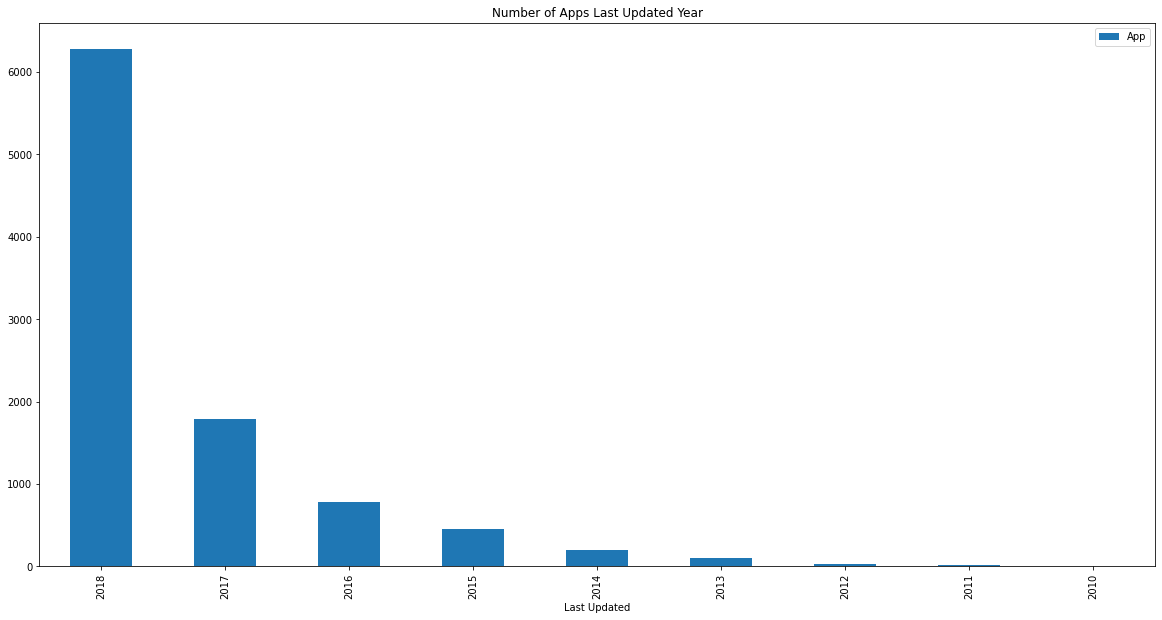

In [149]:
# Graphical view of how many apps are kept updated
# Last Updated contains date and will convert into datatime data type
playstore['Last Updated']=playstore['Last Updated'].astype('datetime64[ns]')
year_df = playstore[['App']]
year_df['Last Updated']=playstore['Last Updated'].dt.year
year_df.groupby('Last Updated').count().sort_values('Last Updated',ascending=False).plot(kind='bar',figsize=(20,10),title='Number of Apps Last Updated Year')

Observation:

Majority of the App are kept updated with 70% of apps updated in 2018

## 5.8 Number of Apps per Category

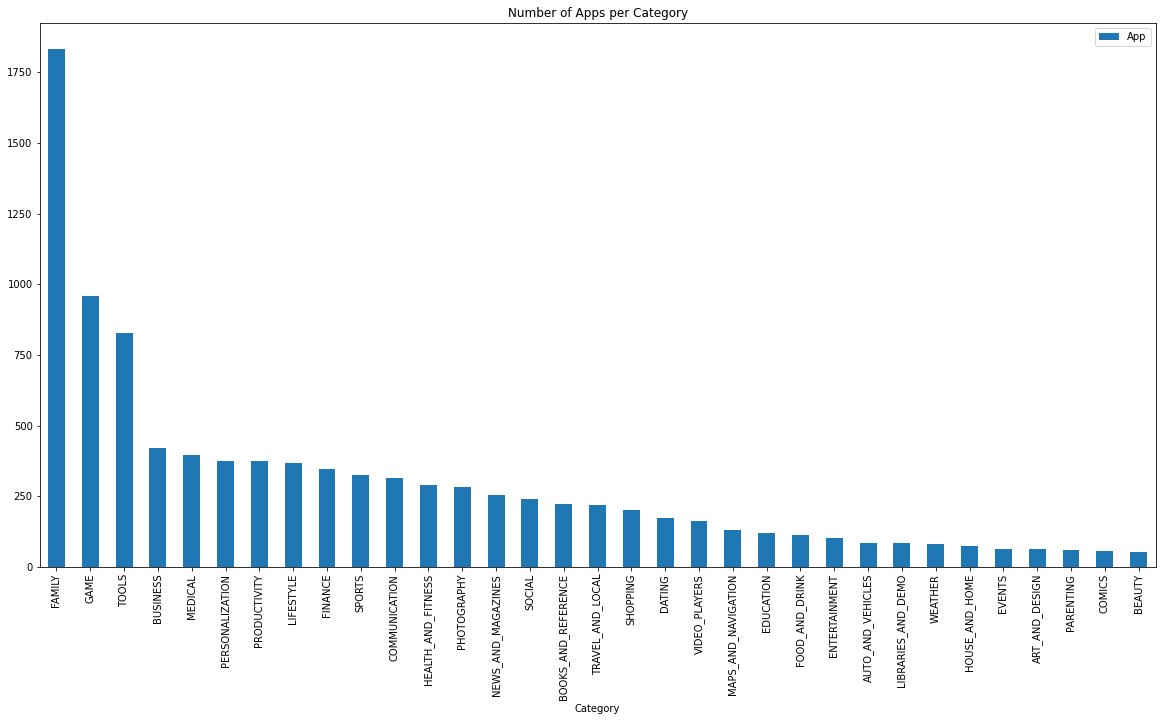

In [150]:
# Number of apps in each category in graphical view
playstore[['Category','App']].groupby('Category').count().sort_values('App',ascending=False).plot(kind='bar',figsize=(20,10),title='Number of Apps per Category')

In [151]:
number_of_apps_in_category = playstore['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

5.8 Observation

Large number (40%) of apps belongs to 'Family, Game and Tools' categories.

##5.9 Type- Free or Paid Analysis

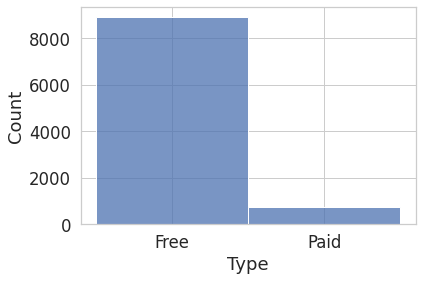

In [153]:
#Plot on Free and Paid apps
sns.histplot(playstore['Type'])

In [154]:
playstore['Type'].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27395ae278>],
      dtype=object)

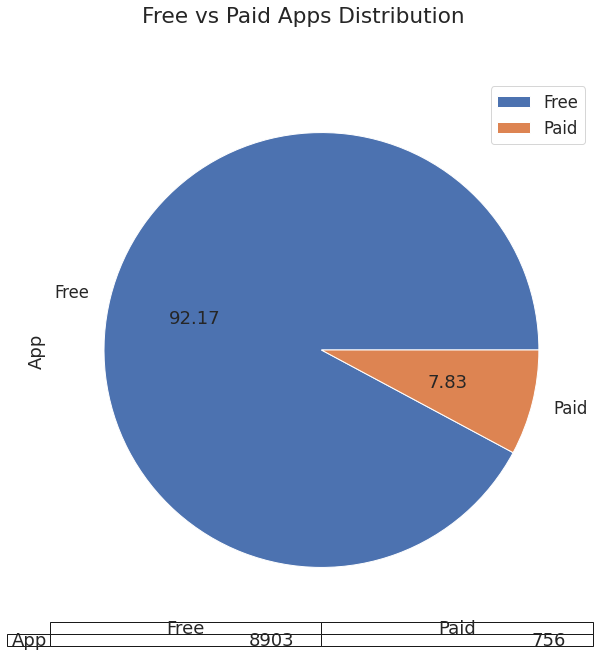

In [155]:
# graphical view of Free vs Paid Apps
playstore[['Type','App']].groupby('Type').count().sort_values('App',ascending=False).plot(kind='pie',subplots=True,figsize=(20,10),table=True,title='Free vs Paid Apps Distribution',autopct='%.2f')

5.9 Observation

92.17% of apps are available for Free usage

##5.10 Analysis on Paid Apps

Text(0.5, 1.0, '% Distribution of Paided Apps Categories')

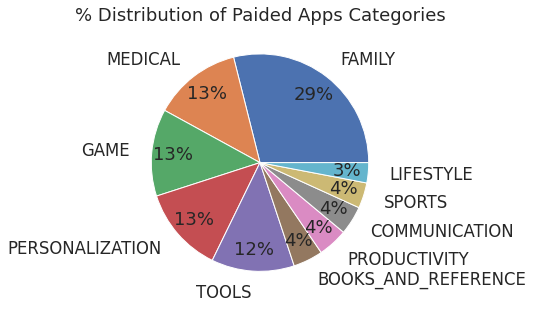

In [157]:
#Distribution of Paided Apps Categories
paided = playstore[playstore['Type'] == 'Paid']
df3 = paided['Category'].value_counts()
df3 = df3.reset_index()
df3 = df3[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(df3['Category']), labels=list(df3['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paided Apps Categories')

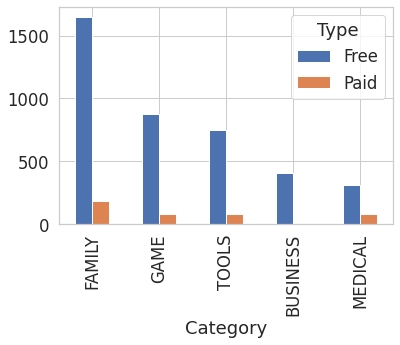

In [158]:
temp = playstore.groupby(by=['Category','Type'])['App'].count().unstack()
temp['Total'] = temp.sum(axis=1)
temp =temp.sort_values(by='Total',ascending=False).head(5)
temp.drop('Total',axis=1,inplace=True)
temp.plot(kind='bar')
del temp

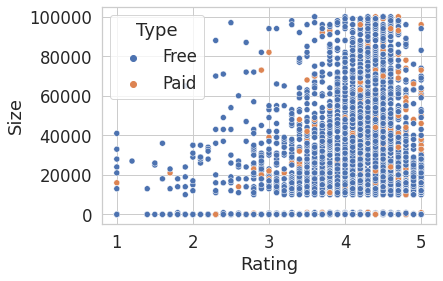

In [159]:
sns.scatterplot(data=playstore, x='Rating', y='Size',hue='Type')

5.10 Observation

Paid apps have average high ratings.

In [160]:
#Top 10 Expensive Apps
expensive = playstore.sort_values(by='Price',ascending=False).head(50)
expensive[['App','Price']].head(10)

,App,Price
4367,I'm Rich - Trump Edition,400.00
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
5359,I am rich(premium),399.99
5358,I am Rich!,399.99
5373,I AM RICH PRO PLUS,399.99
5356,I Am Rich Premium,399.99
5354,I am Rich Plus,399.99
5364,I am rich (Most expensive app),399.99
5369,I am Rich,399.99
5351,I am rich,399.99


Observation:

Above are the top 10 most expensive apps on playstore and their prices.

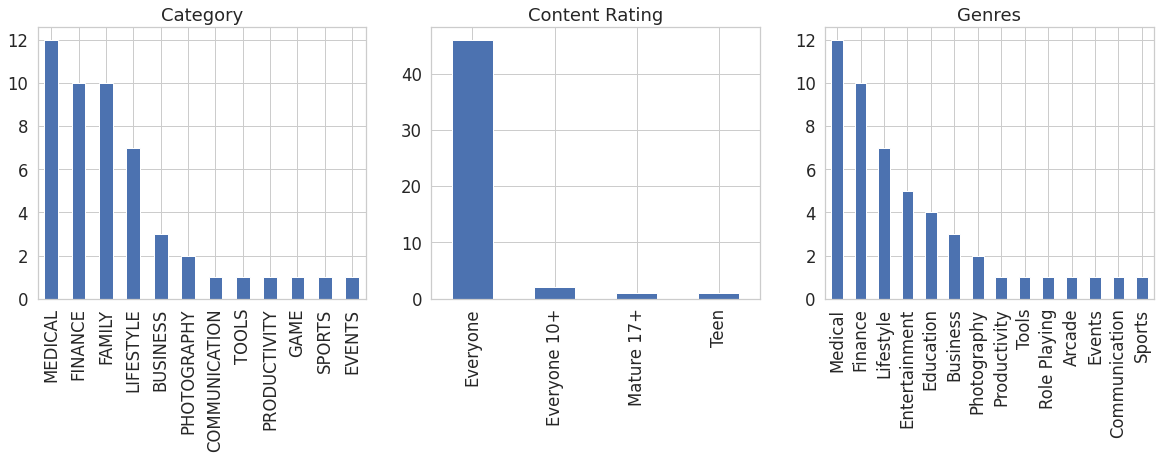

In [161]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
expensive['Category'].value_counts().plot(kind='bar',ax=ax[0],color='b',title='Category')
expensive['Content Rating'].value_counts().plot(kind='bar',ax=ax[1],color='b',title='Content Rating')
expensive['Genres'].value_counts().plot(kind='bar',ax=ax[2],color='b',title='Genres')

Observation:

App that fall into Medical,Finance,Family and Lifestyle category are expected to be expensive.

## 5.11 App Distribution based on Content rating

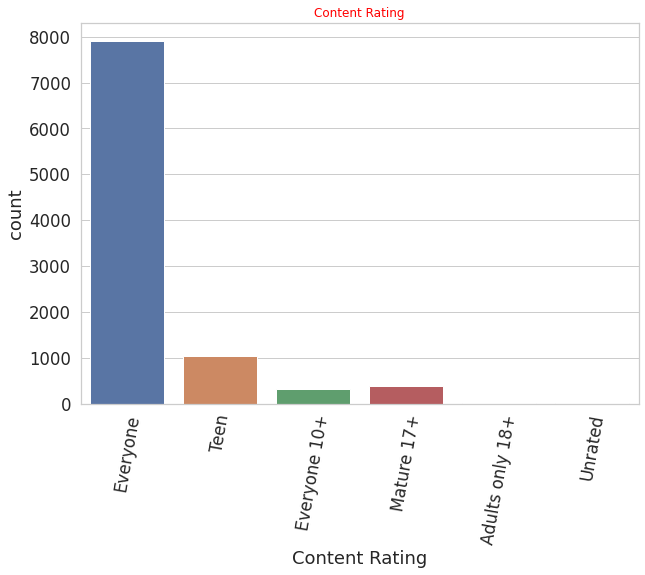

In [162]:
#Plot on age group under Content Rating
plt.figure(figsize=(10,7))
sns.countplot(data=playstore, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color='red',fontsize=12)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2739199f98>],
      dtype=object)

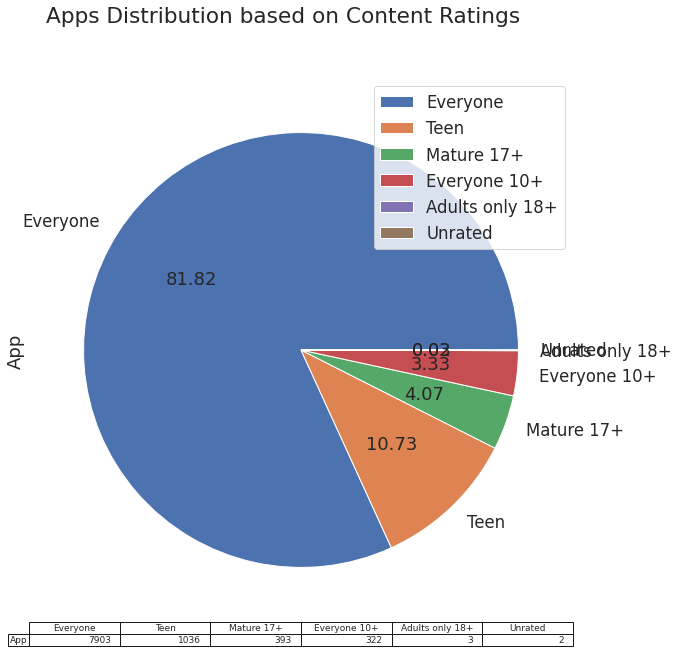

In [163]:
# graphical view of Apps count across Content Ratings 
playstore[['Content Rating','App']].groupby('Content Rating').count().sort_values('App',ascending=False).plot(kind='pie',subplots=True,figsize=(20,10),table=True,title='Apps Distribution based on Content Ratings',autopct='%.2f')

5.11 Observation:

80% of Apps are used by everyone and only 10% of Apps are used by Teens

##5.12 Distribution of apps by categories

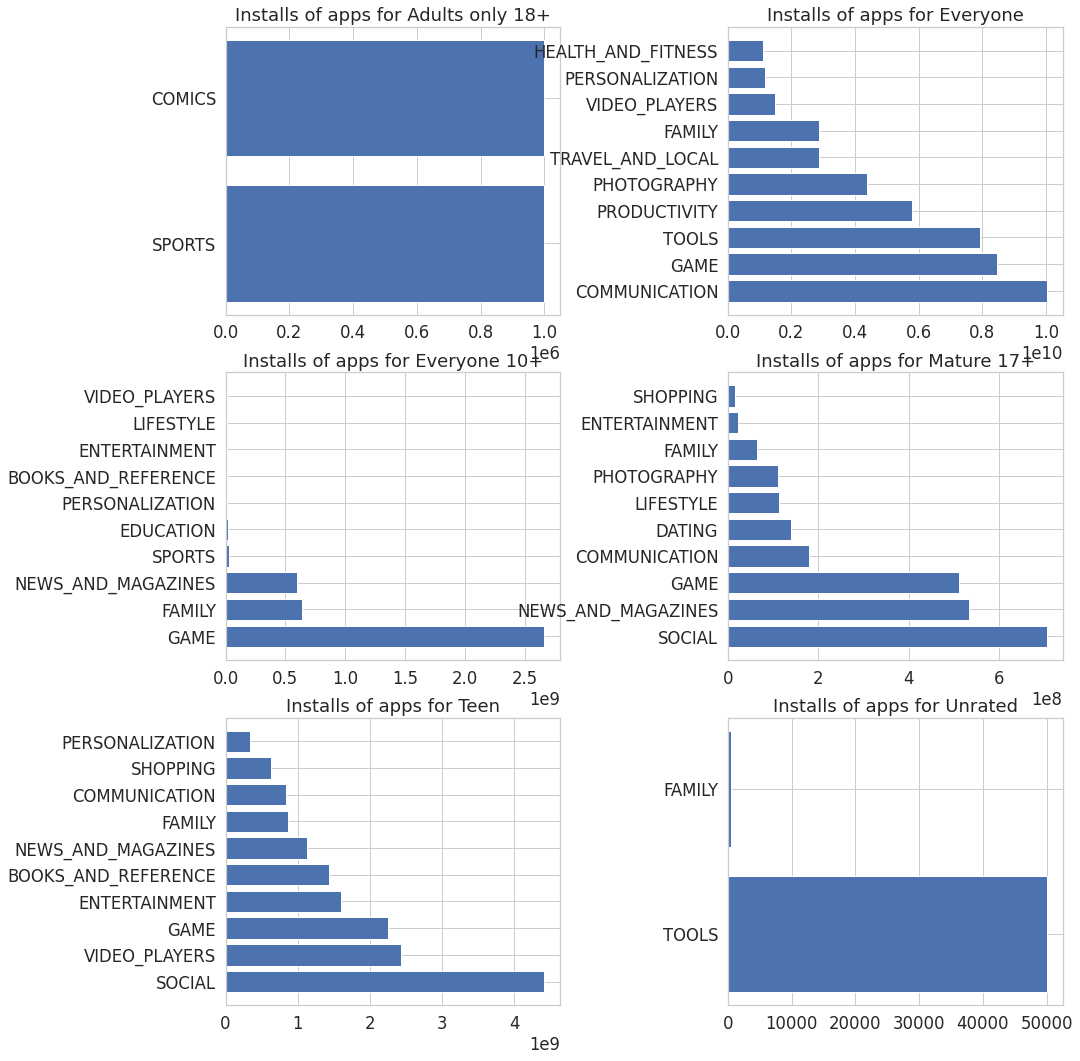

In [164]:
#Distribution of apps by categories
#sample = clean_data[clean_data['Content Rating'] == 'Everyone'].groupby
x,y = (-1,-1)
fig, ax_l = plt.subplots(3,2,figsize = (15,18))
for name, group in playstore.groupby('Content Rating'):
    y=y+1
    x=x+1
    sample = group.groupby('Category').sum()['Installs'].sort_values(ascending=False).head(10)
    sample = sample[sample>0]
    ax_l[int(x/2)][int(y%2)].set_title('Installs of apps for '+name)
    ax_l[int(x/2)][int(y%2)].barh(sample.index, width = sample)
    ax_l[int(x/2)][int(y%2)].grid(linestyle = '-')
plt.subplots_adjust(wspace=0.5)
plt.show()

5.12 Observation:

The collection of plots above clearly represent the interests of various user demographics.

For example, teens absolutely love social networking apps and 10 year olds love games.

The mature 17+ users tend to use a lot of social network apps, which is closely followed by a considerable number of News and magazines apps relative to the teens.

The general populus are much more focused on communication, gaming and productivity apps.

## 5.13 Rating and App Counts

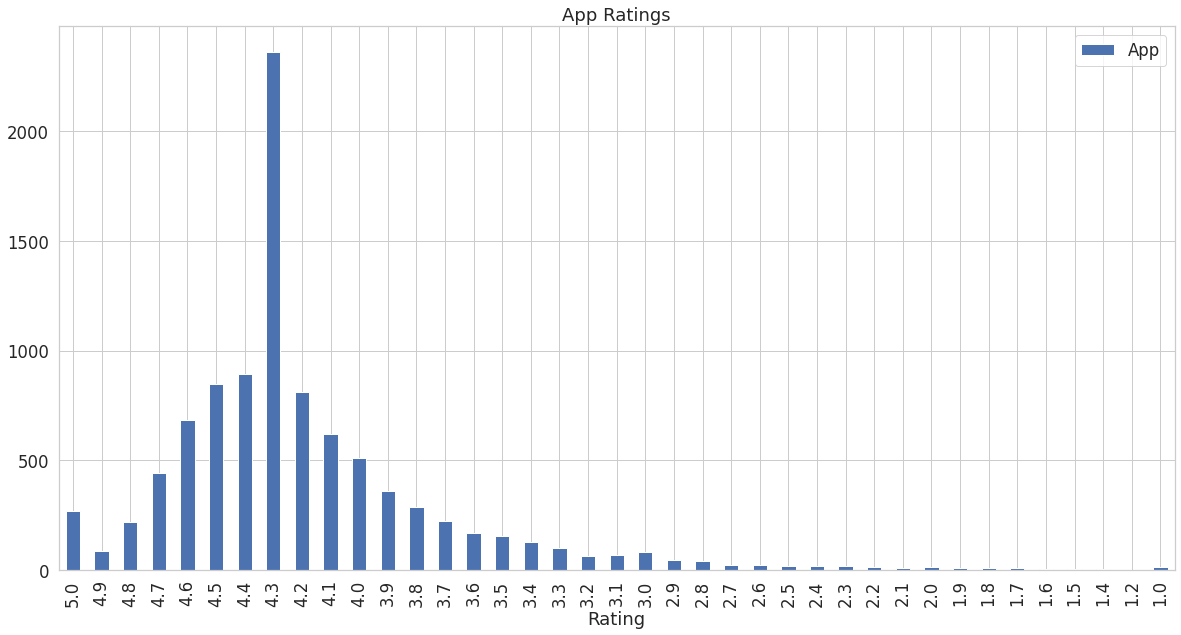

In [165]:
# Graphical view of number of apps for each ratings
playstore[['Rating','App']].groupby('Rating').count().sort_values('Rating',ascending=False).plot(kind='bar',figsize=(20,10),title='App Ratings')

5.13 Observation:

Maximum apps are rated between 4.1 and 4.6.

###How the ratings of the Apps look like?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



Text(0.5, 1.0, 'Distribution of App Ratings')

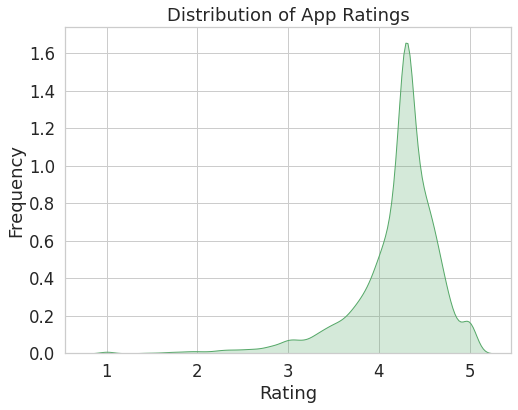

In [171]:
#look at the distribution of app ratings in a distplot
sns.set(font_scale=1.5, style = "whitegrid") #set the font size and background
f, axes = plt.subplots(figsize=(8,6), sharex=True) #set the plotsize

g = sns.distplot(playstore.Rating, hist=False, color="g", kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")

Text(0.5, 1.0, 'Average Rating per Category')

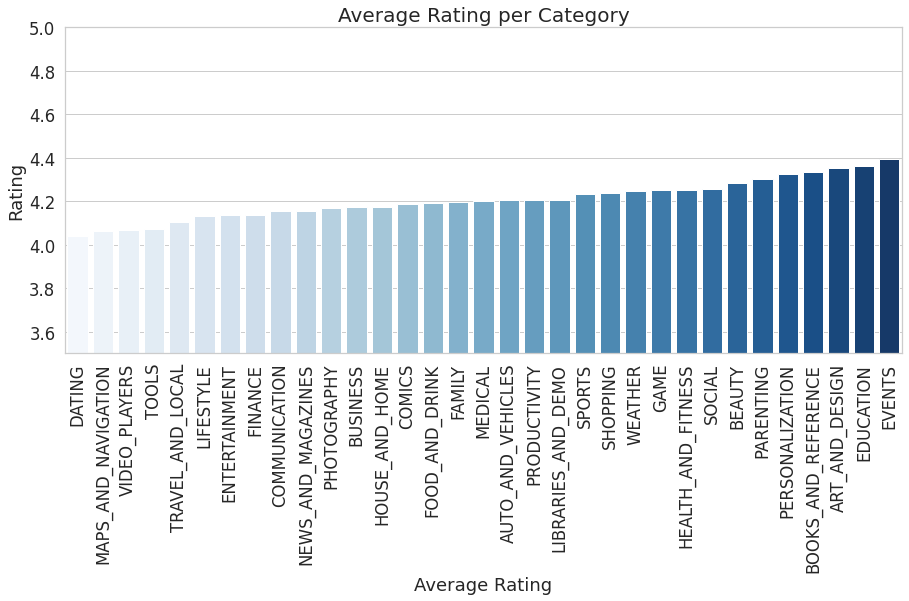

In [166]:
#look at the ratings per app category in a sequential order

#prepare data and sort
#average ratings per category
new_df = playstore.groupby("Category").Rating.mean().reset_index()
sorted_df = new_df.sort_values(by=["Rating"], ascending=True)  #sort by rating in descending order

sns.set(font_scale=1.5, style="whitegrid")
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

#since we have categorical data in the x axis, we will look data with a barplot
ax = sns.barplot(x="Category", y="Rating", data=sorted_df, palette="Blues") 
for item in ax.get_xticklabels():
    item.set_rotation(90) #rotate every xticklabels for readability
ax.set(ylim=(3.5,5)) #zoom in y axes since values are distributed around 4
plt.xlabel("Average Rating")
plt.title("Average Rating per Category", size=20)

## 5.14 Number of Apps for Installations

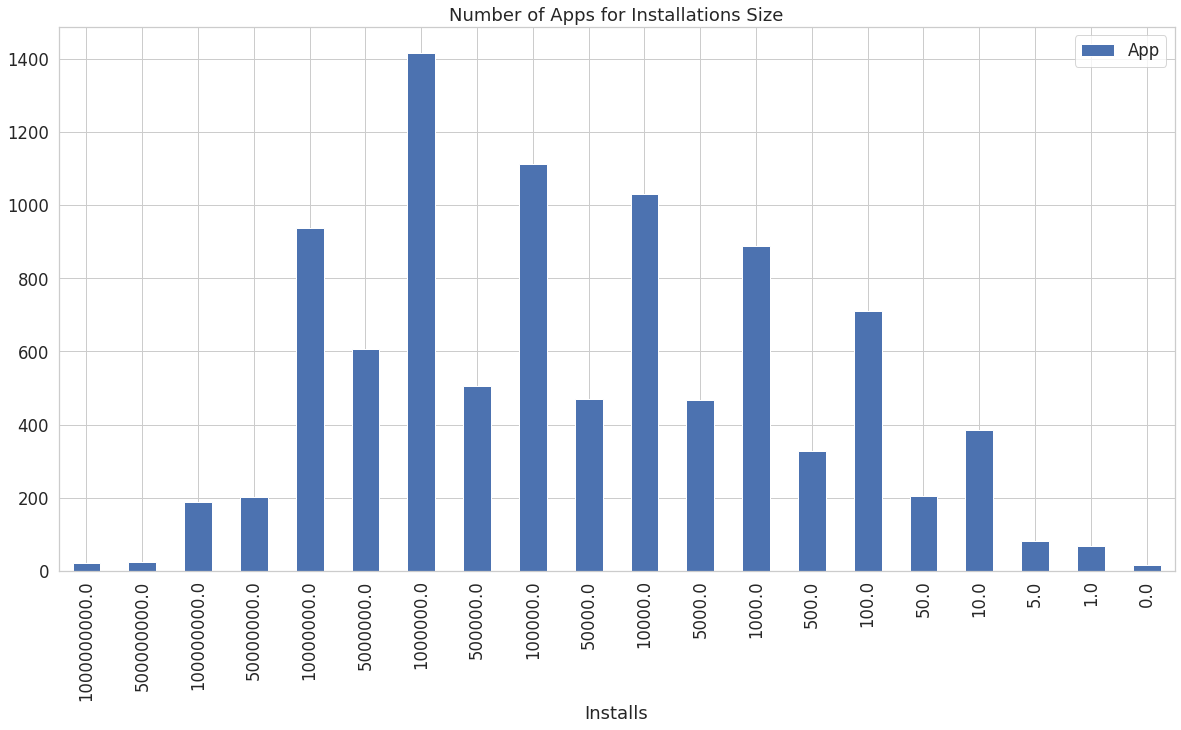

In [167]:
# Graphical view of Number of Installations

playstore[['Installs','App']].groupby('Installs').count().sort_values('Installs',ascending=False).plot(kind='bar',figsize=(20,10),title='Number of Apps for Installations Size')

In [168]:
# Top Apps with 1+ billion Installs and Highest review
playstore.loc[(playstore.Installs==1000000000)].sort_values('Reviews',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Update_date,Update_year,year,month
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,2018-08-03,2018,2018,8
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018-08-03,2018,2018,8
2545,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,2018-07-31,2018,2018,7
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018-08-01,2018,2018,8
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,2018-07-12,2018,2018,7
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,2018-08-02,2018,2018,8
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1.000000e+09,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,2018-08-06,2018,2018,8
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018-08-03,2018,2018,8
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,2018-08-01,2018,2018,8
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1.000000e+09,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,2018-07-31,2018,2018,7


5.14 Observation:

There are 20 applications with 1+ billion installations and Top 2 apps are Facebook and Whatsapp

###If an app has high number of installs, does it mean that it gets the more reviews from the users?

In [170]:
#Number of reviews are in object dtype
playstore.Reviews = playstore.Reviews.apply(lambda x: int(x)) #convert object into int

#look at the total reviews per install category
total_reviews = playstore.groupby('Installs').Reviews.sum().reset_index()
sorted_total_reviews = total_reviews.sort_values(by='Reviews', ascending=False).reset_index(drop=True)
print(sorted_total_reviews.head(5))

       Installs    Reviews
0  1.000000e+08  762277068
1  1.000000e+09  400227891
2  1.000000e+07  327728882
3  5.000000e+07  247402923
4  5.000000e+08  236454586


Observation:

Popular apps (apps having more than 100M installs) received more reviews in total

1,000,000,000+ apps have more ditributed reviews

Apps downloaded more than 100M received more attention

100M+ apps have more apps having outlier reviews

##5.15 Ratings versus Installs

Text(0.5, 1.0, 'Rating VS Installs')

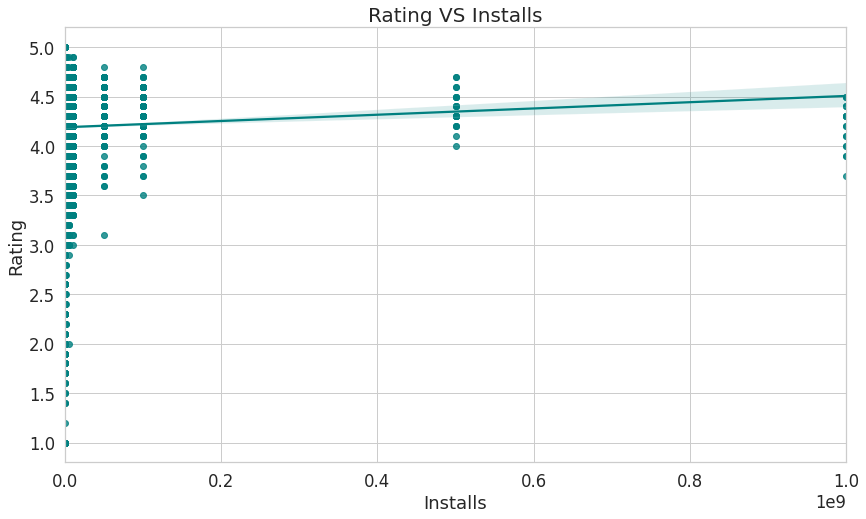

In [172]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=playstore);
plt.title('Rating VS Installs',size = 20)

## 5.16 Which android version must be supported by an app?

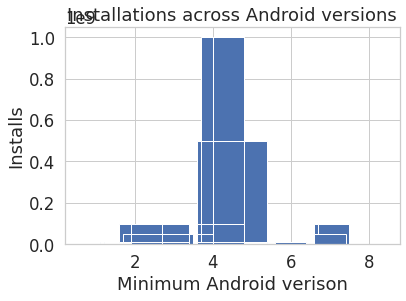

In [169]:
#Checking the distribution of Installations across minimum supported android version
playstore.loc[:, 'Android Ver'] = playstore['Android Ver'].apply(lambda x: 4.4 if type(x) == float or x=='Varies with device' else x[:3]).astype('float64')
fig, ax = plt.subplots()
ax.bar(x = playstore['Android Ver'], height = playstore['Installs'])
ax.set_title('Installations across Android versions')
ax.set_xlabel('Minimum Android verison')
ax.set_ylabel('Installs')
plt.show()

5.16 Observation:

The graph peaks at 4, indicating that most of the applications are cmpatible with versions 4 onwards. 

Inorder to reach maximum number of smart phone users, a developer must make the application compatible with an android version of 4 and above. 

We can expect this peak to gradually shift right with imporvements in technology and economy.